## A simple RNN implelented in TensorFlow

We will build a simple recurrent neural network that takes in the first term of a geometric progression (multiplier = 2) and returns its first 5 terms

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

Basic structure of the RNN

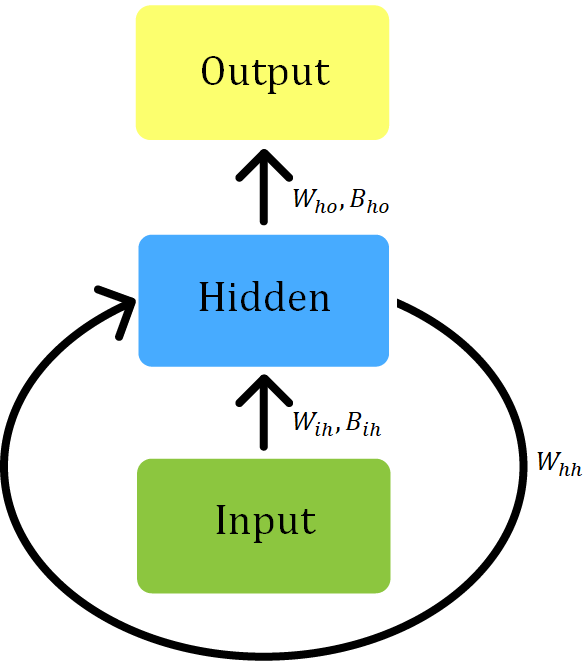

In [2]:
from IPython.core.display import Image 
Image(filename='images/rnn.png')

In [2]:
#sample data
x1 = np.random.randint(0, 100, [10000]).reshape(10000,1)
y1 = x1*2
y2 = y1*2
y3 = y2*2
y4 = y3*2

In [3]:
data_x = x1
data_y1 = [x1,y1,y2,y3,y4]

In [4]:
data_x.shape

(10000, 1)

In [5]:
data_y = np.array(data_y1)

In [6]:
data_y = data_y.reshape(5,10000).transpose()
data_y.shape

(10000, 5)

In [7]:
#hyperparams
epochs = 1000
batch_size = 64
num_batches = data_x.shape[0]//64
num_steps = data_y.shape[1]
epsilon = 1e-3

In [8]:
tf.reset_default_graph()

In [9]:
init = tf.contrib.layers.xavier_initializer()

In [11]:
#data
x = tf.placeholder(tf.float32, [None, 1], name='x')
y = tf.placeholder(tf.float32, [None, 5], name='y')
hidden = tf.placeholder(tf.float32, [None,20], name='hidden')

#params for input to hidden
w_i_h = tf.get_variable(name='w_i_h', shape=[1,20])
b_i_h = tf.Variable(tf.ones([20])*0.1, name='b_i_h')

#params for hidden(t) to hidden(t+1)
w_h_h = tf.get_variable(name = 'w_h_h', shape=[20,20])

#params for hidden(t) to output
w_h_o = tf.get_variable(name='w_h_o', shape=[20, 1])
b_h_o = tf.Variable(tf.ones([1])*0.1, name='b_h_o')

In [12]:
#neural net
def rnn_net(x, h_init, k):
    yo = []
    for i in range(k):
        yh = tf.nn.relu(tf.matmul(x,w_i_h) + b_i_h + tf.matmul(h_init, w_h_h))  #this is where we account for the metworks previous state
        yo.append(tf.nn.relu(tf.matmul(yh, w_h_o) + b_h_o))
        h_init = yh
        
    return tf.concat(yo, axis=1), yh

In [13]:
#loss and train
y_out, y_hidden = rnn_net(x, hidden, num_steps)

#loss = tf.reduce_mean((y-y_out)**2) + epsilon
loss = tf.losses.huber_loss(y, y_out)  #a better loss for regression like problems
train = tf.train.AdamOptimizer(0.0001).minimize(loss)

In [14]:
sess = tf.Session()

In [15]:
sess.run(tf.global_variables_initializer())

In [16]:
losses =[]
h = np.zeros([batch_size, 20], np.float32)
for i in range(epochs):
    ptr = 0
    for  j in range(num_batches):
        x_train = data_x[ptr: ptr+batch_size]
        y_train = data_y[ptr: ptr+batch_size]
        ptr += batch_size
        loss_curr, _ = sess.run([loss, train], feed_dict={x: x_train, y: y_train, hidden: h})
        
    if(i%10 == 0):
        losses.append(loss_curr)
        print(loss_curr)


253.556
0.536319
0.00940658
0.0058236
0.0036245
0.00257117
0.0018699
0.00141701
0.00111334
0.000897513
0.000771175
0.00190144
0.000638293
0.000469566
0.00042138
0.000380564
0.000376229
0.000315824
0.00251506
0.000272925
0.000283637
0.00025272
0.000218054
0.000199914
0.00271225
0.000184804
0.0001636
0.000155536
0.000148691
0.000506571
0.000154869
0.00306844
0.0001177
0.00232758
0.000114516
0.000103112
0.000104351
0.012523
8.9463e-05
8.54458e-05
8.66628e-05
0.00198153
0.00079187
7.32642e-05
8.32605e-05
0.000519179
6.4186e-05
6.13178e-05
8.86514e-05
5.85238e-05
0.025203
0.00379916
5.07647e-05
0.00130848
4.88436e-05
9.20621e-05
4.42498e-05
0.00237648
4.24954e-05
0.000165727
0.00215333
3.69614e-05
3.57355e-05
3.55663e-05
0.00160182
3.21738e-05
3.13439e-05
3.01858e-05
2.92587e-05
3.18363e-05
2.85641e-05
6.2667e-05
2.51458e-05
2.46694e-05
2.34895e-05
3.01297e-05
2.17942e-05
2.11371e-05
0.000116636
0.00241971
9.79458e-05
2.35462e-05
3.25274e-05
0.00145243
0.000583611
0.000566624
0.000790727
1.

### Now it is time to test our network

In [24]:
#sample input data
data_test = np.random.randint(0,100,10).reshape(10,1)

In [25]:
h = np.zeros([10,20], np.float32)

In [28]:
a,_ = sess.run(rnn_net(data_test.astype(np.float32), h, num_steps))

In [29]:
for i, j in zip(data_test, np.rint(a)):
    print(i,j)

[89] [   89.   178.   356.   712.  1424.]
[96] [   96.   192.   384.   768.  1536.]
[88] [   88.   176.   352.   704.  1408.]
[59] [  59.  118.  236.  472.  944.]
[16] [  16.   32.   64.  128.  256.]
[7] [   7.   14.   28.   56.  112.]
[50] [  50.  100.  200.  400.  800.]
[29] [  29.   58.  116.  232.  464.]
[98] [   98.   196.   392.   784.  1567.]
[57] [  57.  114.  228.  456.  912.]


Outputs are as expected

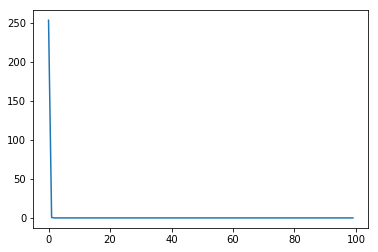

In [21]:
plt.plot(losses)

In [30]:
#inputing numbers larger than 100
data_test = np.random.randint(100,1000,30).reshape(30,1)

h = np.zeros([30,20], np.float32)

a,_ = sess.run(rnn_net(data_test.astype(np.float32), h, num_steps))

for i, j in zip(data_test, np.rint(a)):
    print(i,j)

[120] [  120.   240.   480.   960.  1919.]
[483] [  483.   966.  1932.  3863.  7724.]
[943] [   943.   1886.   3772.   7542.  15081.]
[533] [  533.  1066.  2132.  4263.  8524.]
[621] [  621.  1242.  2484.  4967.  9931.]
[800] [   800.   1600.   3200.   6398.  12794.]
[153] [  153.   306.   612.  1224.  2447.]
[953] [   953.   1906.   3812.   7622.  15241.]
[134] [  134.   268.   536.  1072.  2143.]
[991] [   991.   1982.   3964.   7926.  15848.]
[660] [   660.   1320.   2640.   5279.  10555.]
[809] [   809.   1618.   3236.   6470.  12938.]
[317] [  317.   634.  1268.  2535.  5070.]
[223] [  223.   446.   892.  1784.  3566.]
[433] [  433.   866.  1732.  3463.  6925.]
[894] [   894.   1788.   3576.   7150.  14297.]
[476] [  476.   952.  1904.  3807.  7612.]
[298] [  298.   596.  1192.  2383.  4766.]
[618] [  618.  1236.  2472.  4943.  9883.]
[880] [   880.   1760.   3520.   7038.  14073.]
[418] [  418.   836.  1672.  3343.  6685.]
[953] [   953.   1906.   3812.   7622.  15241.]
[397] [  

The network also works well (albiet with limited accuracy) with numbers larger than 100 as well